In [ ]:
# Calculate a current sharpe ratio for the 
# portfolio that I currently have

# To do this I will have to get data on each
# of the stocks through yahoo finance and calculate
# the sharpe based off of that

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime

In [ ]:
test = datetime.datetime.now()
print(test)
# datetime.datetime.strftime(datetime.datetime.utcnow())

In [ ]:
def calculate_sharpe():
    pass

In [ ]:

portfolio = {"spy":59,
             "rtx":17.8758,
             "nvda":13.1138,
             "rddt":23,
             "voo":3}

# Sum of portfolio
print(sum([yf.Ticker(x).info["ask"] * portfolio[x] for x in portfolio]))

In [ ]:
yf.Ticker("spy").info["ask"]

In [ ]:
msft.news

In [ ]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

In [ ]:
test = msft.history(start = datetime.datetime.utcnow() - datetime.timedelta(days=5), end = datetime.datetime.utcnow())

In [ ]:
# Time to calculate sharpe on each of the ticker simbols

risk = calculate_risk(list(portfolio.keys()))
sharpe = calculate_sharpe()

print(sharpe)

In [ ]:
portfolio.keys()

In [ ]:
test = create_standard_deviation_list(yf.Ticker("spy").history(start=datetime.datetime.utcnow() - datetime.timedelta(days=180), end=datetime.datetime.utcnow()))
print(sum(test) / len(test))
plt.plot(test)

In [ ]:
print(avg_monthly_return(yf.Ticker("spy").history(start=datetime.datetime.utcnow() - datetime.timedelta(days=180))))

In [ ]:
def avg_monthly_return(historical_dataset):
    avg = 0
    for i in range(0, len(historical_dataset) - 29, 30):
        avg += historical_dataset["Open"][i: i + 30].avg()

    return avg


In [ ]:
# This function is for creating a standard deviation list starting from 180 - 14 days ago since going on 
# a sliding window of 14 days
def create_standard_deviation_list(historical_dataset, window=14):
    standard_deviation_list = []
    for end in range(window, len(historical_dataset)):
        start = end - window
        standard_deviation = historical_dataset[start:end]["Close"].std()
        standard_deviation_list.append(standard_deviation)
    return standard_deviation_list

In [ ]:
def create_moving_average_plot(historical_dataset, window=14):
    moving_average_list = []
    moving_average_dataframe = pd.DataFrame()
    for end in range(window, len(historical_dataset)):
        start = end - window
        average = historical_dataset[start:end]["Close"].mean()
        moving_average_list.append(average)
        new_row = pd.Series(average, name=historical_dataset[end].index())
        moving_average_dataframe.append(new_row)
    return moving_average_dataframe

In [ ]:
# The risk is going to be calculated based off of the 
def calculate_charts(tickers):
    # Default risk is 0
    # Create a figure with subplots
    fig, axs = plt.subplots(len(tickers), 1, figsize=(10, 6 * len(tickers)))

    standard_deviation_list=[]
    moving_average_plot_list=[]
    # Each ticker will have a bunch of plots that go with it.
    for i, ticker in enumerate(tickers):
        # Going to do calculation on the previous 180 days
        historical_dataset = yf.Ticker(ticker).history(start=datetime.datetime.utcnow() - datetime.timedelta(days=180), end=datetime.datetime.utcnow())
        axs[i].plot(historical_dataset["Close"])
        axs[i].set_title(ticker)

        # When this value goes up the momentum should also go up with it. Check RSI also 
        standard_deviation = historical_dataset.std()
        
        # Going on a moving average of 14 days
        standard_deviation_list.append(create_standard_deviation_list(historical_dataset))     
        moving_average_plot_list.append(create_moving_average_plot(historical_dataset))

    return [standard_deviation_list, moving_average_plot]

In [ ]:
# A strat that I can use is to compile a list of stocks and run the analysis on the stocks
# one by one and save their results to like a databse or a variable. This variable will then
# be used to be updated to get the new results instead of saving all of the data just use the data"
# to compute the value that you are wanting to look at that is meaningful.

# When the distance between the standard deviation and the average are high that means that there 
# is a period of high movement that just happened or is happening

In [ ]:
standard_deviation_list, moving_average_plot = calculate_charts(list(portfolio.keys()))

In [ ]:
# STarting over
tickers_object = yf.Tickers(list(portfolio.keys()))

In [ ]:
tickers_object

In [280]:
start = datetime.datetime.utcnow() - datetime.timedelta(days=180)
end = datetime.datetime.utcnow()
tickers_history = tickers_object.history(start=start, end=end)

/var/folders/81/34wfhh9x5bb4ts08jkklfls80000gn/T/ipykernel_59492/3594207809.py:1: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  start = datetime.datetime.utcnow() - datetime.timedelta(days=180)
/var/folders/81/34wfhh9x5bb4ts08jkklfls80000gn/T/ipykernel_59492/3594207809.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  end = datetime.datetime.utcnow()
[*********************100%%**********************]  5 of 5 completed


In [ ]:
tickers_history

In [ ]:
# Just playing around with feeling things out
tickers_history["Open"]
tickers_history["Open"].cov()
tickers_history["Open"].pct_change()
tickers_history["Open"].mean()

In [217]:
# Quick sharpe so I can get satisfaction
# start = datetime.datetime.utcnow() - datetime.timedelta(days=180)
# end = datetime.datetime.utcnow()
spy_range = tickers_history["Open"]["SPY"]

<Axes: xlabel='Date'>

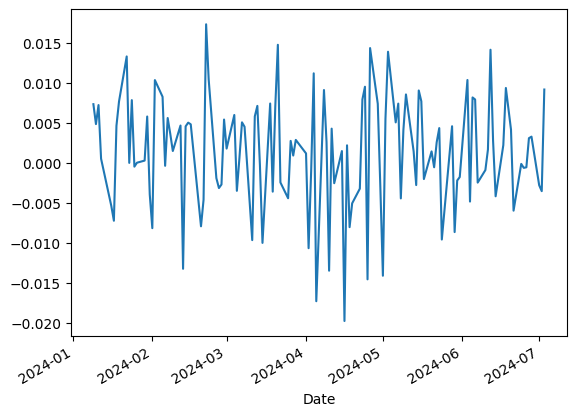

In [222]:
spy_range.pct_change().plot()

In [ ]:
def rolling_standard_deviation_line(series):
    pass

In [297]:
def create_chart_with_regression_line_from_series(series):
    # Get x (index) and y (values) for plotting
    x = np.arange(len(series))  # Use the index positions as x values
    y = series.values            # Use the values as y values
    
    # Perform linear regression
    m, c = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear fit)
    
    # Create scatter plot of the data
    plt.scatter(x, y, color='blue', label='Data points')
    
    # Plot the regression line
    plt.plot(x, m*x + c, color='red', label='Regression line')
    
    # Add labels and legend
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(' Day with Regression Line')
    plt.legend()

    # Plotting standard devitation line also
    # Calculate standard deviation
    std_dev = np.std(y)
    plt.axhline(y=np.mean(y) + std_dev, color='green', linestyle='--', label='Mean + 1 Std Dev')
    plt.axhline(y=np.mean(y) - std_dev, color='green', linestyle='--', label='Mean - 1 Std Dev')
    
    # Show plot
    plt.grid(True)
    plt.show()

In [278]:
tickers_history

Price      Capital Gains            Close                                     \
Ticker               SPY  VOO        NVDA       RDDT         RTX         SPY   
Date                                                                           
2023-07-10           0.0  0.0   42.167374        NaN   94.896729  433.595154   
2023-07-11           0.0  0.0   42.392307        NaN   95.432152  436.356506   
2023-07-12           0.0  0.0   43.888859        NaN   94.254219  439.867371   
2023-07-13           0.0  0.0   45.963242        NaN   94.594940  443.358582   
2023-07-14           0.0  0.0   45.455391        NaN   93.621445  443.082397   
...                  ...  ...         ...        ...         ...         ...   
2024-06-27           0.0  0.0  123.989998  63.580002  100.620003  546.369995   
2024-06-28           0.0  0.0  123.540001  63.889999  100.389999  544.219971   
2024-07-01           0.0  0.0  124.300003  66.589996   99.550003  545.340027   
2024-07-02           0.0  0.0  122.669998  73.510002  100.410004  549.010010   
2024-07-03           0.0  0.0  128.279999  73.620003  100.739998  551.460022   

Price                  Dividends            ... Stock Splits                 \
Ticker             VOO      NVDA RDDT  RTX  ...         NVDA RDDT  RTX  SPY   
Date                                        ...                               
2023-07-10  398.081421       0.0  NaN  0.0  ...          0.0  NaN  0.0  0.0   
2023-07-11  400.633698       0.0  NaN  0.0  ...          0.0  NaN  0.0  0.0   
2023-07-12  403.787079       0.0  NaN  0.0  ...          0.0  NaN  0.0  0.0   
2023-07-13  407.078369       0.0  NaN  0.0  ...          0.0  NaN  0.0  0.0   
2023-07-14  406.753204       0.0  NaN  0.0  ...          0.0  NaN  0.0  0.0   
...                ...       ...  ...  ...  ...          ...  ...  ...  ...   
2024-06-27  502.066010       0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2024-06-28  500.130005       0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2024-07-01  501.279999       0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2024-07-02  504.529999       0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2024-07-03  506.809998       0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   

Price               Volume                                          
Ticker      VOO       NVDA       RDDT       RTX       SPY      VOO  
Date                                                                
2023-07-10  0.0  353908000        NaN   3300300  62443500  3362300  
2023-07-11  0.0  298244000        NaN   6209900  64463800  3181900  
2023-07-12  0.0  481277000        NaN   4943300  91924500  4246400  
2023-07-13  0.0  478204000        NaN   3357600  72425200  3273400  
2023-07-14  0.0  772075000        NaN   3454200  69761800  3678400  
...         ...        ...        ...       ...       ...      ...  
2024-06-27  0.0  252571700  1704800.0   6955400  35041500  3619700  
2024-06-28  0.0  315516700  1921900.0  13853200  76144500  5598600  
2024-07-01  0.0  284885500  3609100.0   4475200  40297800  4368500  
2024-07-02  0.0  218374000  6089600.0   8299900  40434800  4210100  
2024-07-03  0.0  215749000  2718100.0   2149200  32789900  2131100  

[249 rows x 37 columns]

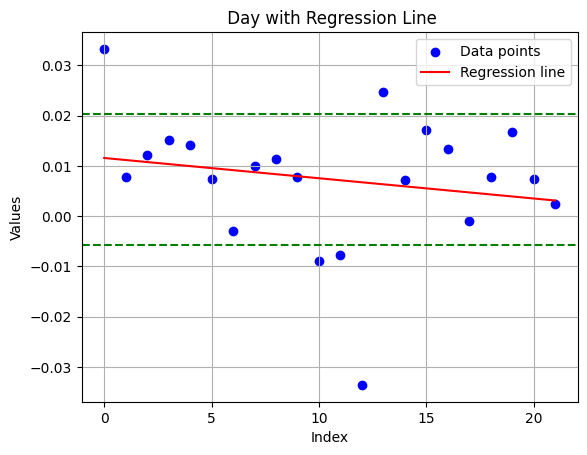

In [296]:
# Do percent change but on every week monday.
# Plotting the percent change and doing a linear
# regression through it to see when is the most volatile time or if it is getting less volatile or not
ticker = "SPY"
range_series = tickers_history["Open"]
mondays_only = range_series[ticker][range_series[ticker].index.dayofweek == 0]
create_chart_with_regression_line_from_series(mondays_only.pct_change().dropna())

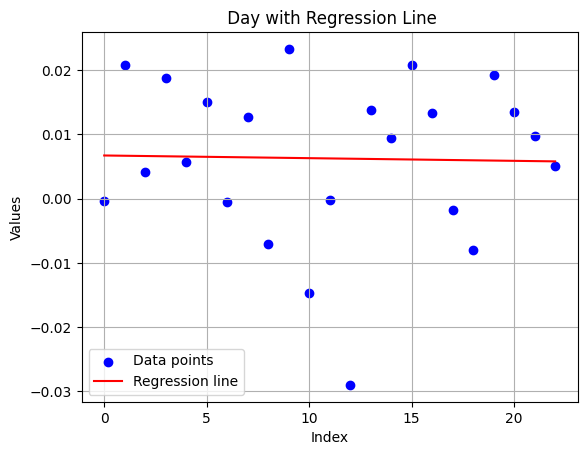

In [290]:
# Do percent change but on every week monday
fridays_only = range_series[ticker][range_series[ticker].index.dayofweek == 4]
create_chart_with_regression_line_from_series(fridays_only.pct_change().dropna())

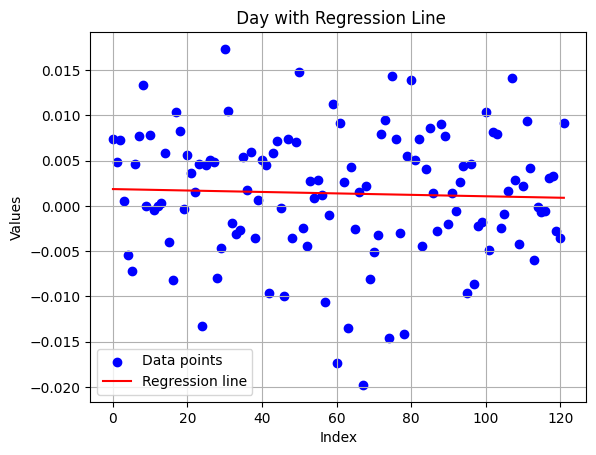

In [291]:
create_chart_with_regression_line_from_series(range_series[ticker].pct_change().dropna())